# K-Means Clustering

In [92]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

from pandas import read_csv
file = 'Avocado.csv'

In [93]:
data_raw = read_csv(file)
data_raw.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [109]:
y_col = 'Total Bags'; y = data_raw[y_col].values
x_col = 'Total Volume'; x = data_raw[x_col].values
c_map = 'Small Bags'
data_s = data_raw[[x_col, y_col]].values
data_c = data_raw[c_map].values

Text(0.5, 1.0, 'Random dependacy')

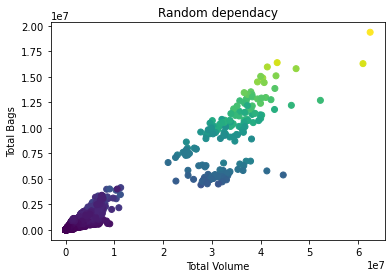

In [110]:
plt.scatter(data_s[:,0],data_s[:,1], c = data_c , cmap='viridis')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Random dependacy')

In [129]:
points = data_s
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
y_km = kmeans.fit_predict(points)

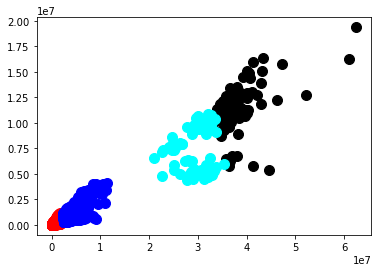

In [112]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')

In [132]:
import scipy.cluster.hierarchy as sch
dendrogram_p = points[0:25]

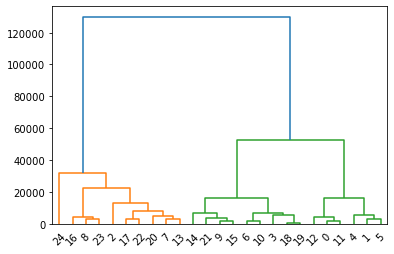

In [133]:
dendrogram = sch.dendrogram(sch.linkage(dendrogram_p, method='ward'))

# Conclusion
Here we see an algorihtm for K-means clustering. Please Try out some different columns as your excercise :)